In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Combining more detailed netflix title dataset with the Netflix Prize data so that sentence transformers can be applied and then can aid the recommender model.


In [2]:
old_titles_df = pd.read_csv('data/movie_titles.csv', encoding = 'iso8859_15', header=None, usecols=range(3), lineterminator='\n', names = ['movie_id', 'year', 'title'])
new_titles_df = pd.read_csv('data/netflix_titles.csv')

In [3]:
old_titles_df.head(5)

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [4]:
new_titles_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
new_titles_df.shape

(8807, 12)

In [6]:
old_titles_df.shape

(17770, 3)

Inner join

In [7]:
new_titles_df[['title', 'release_year']]

,title,release_year
0,Dick Johnson Is Dead,2020
1,Blood & Water,2021
2,Ganglands,2021
3,Jailbirds New Orleans,2021
4,Kota Factory,2021
...,...,...
8802,Zodiac,2007
8803,Zombie Dumb,2018
8804,Zombieland,2009
8805,Zoom,2006


In [9]:
old_titles_df[['title', 'year']]

,title,year
0,Dinosaur Planet,2003.0
1,Isle of Man TT 2004 Review,2004.0
2,Character,1997.0
3,Paula Abdul's Get Up & Dance,1994.0
4,The Rise and Fall of ECW,2004.0
...,...,...
17765,Where the Wild Things Are and Other Maurice Se...,2002.0
17766,Fidel Castro: American Experience,2004.0
17767,Epoch,2000.0
17768,The Company,2003.0


In [10]:
old_titles_df.year.describe()

count    17763.000000
mean      1990.263694
std         16.507891
min       1896.000000
25%       1985.000000
50%       1997.000000
75%       2002.000000
max       2005.000000
Name: year, dtype: float64

Old dataset movies range from 1896 - 2005 

In [11]:
new_titles_df.release_year.describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

Most of the movies after 2005

<AxesSubplot:xlabel='release_year', ylabel='Count'>

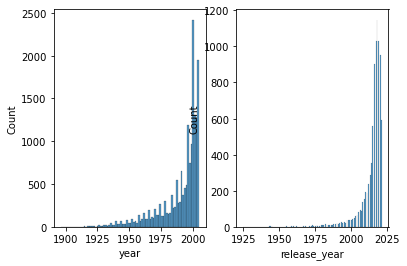

In [13]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(old_titles_df.year, ax=axs[0])
sns.histplot(new_titles_df.release_year, ax=axs[1])

In [14]:
trimmed_new = new_titles_df[new_titles_df.release_year < 2006]

yikes, only 863 movies... this model may be a no-go

<AxesSubplot:xlabel='type', ylabel='Count'>

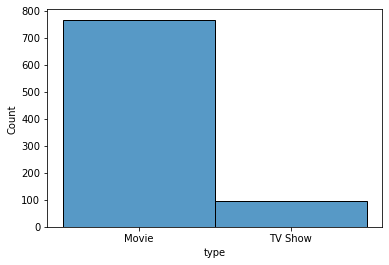

In [15]:
sns.histplot(trimmed_new.type)

In [17]:
old_titles_df

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [20]:
df_joined = trimmed_new.set_index('title').join(old_titles_df.set_index('title'), on = 'title', how = 'inner')

In [24]:
df_joined = df_joined.reset_index()

In [25]:
df_joined

,title,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_id,year
0,Jeans,s25,Movie,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,372,1998.0
1,Jaws,s42,Movie,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,798,1975.0
2,Jaws 2,s43,Movie,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...,11171,1978.0
3,Jaws 3,s44,Movie,Joe Alves,"Dennis Quaid, Bess Armstrong, Simon MacCorkind...",United States,"September 16, 2021",1983,PG,98 min,"Action & Adventure, Horror Movies, Thrillers",After the staff of a marine theme park try to ...,8470,1986.0
4,Jaws: The Revenge,s45,Movie,Joseph Sargent,"Lorraine Gary, Lance Guest, Mario Van Peebles,...",United States,"September 16, 2021",1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers","After another deadly shark attack, Ellen Brody...",9762,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Who's That Knocking at My Door?,s8736,Movie,Martin Scorsese,"Zina Bethune, Harvey Keitel, Anne Collette, Le...",United States,"July 1, 2019",1967,R,90 min,"Classic Movies, Dramas, Independent Movies",A woman's revelation that she was once raped s...,12744,1969.0
470,Wild Wild West,s8743,Movie,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch...",4670,1999.0
471,Willy Wonka & the Chocolate Factory,s8746,Movie,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany","January 1, 2020",1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...,14050,1971.0
472,XXX: State of the Union,s8768,Movie,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i...",5730,2005.0


Well 474 items isnt too bad

In [26]:
df_joined.to_csv('data/movies_joined.csv', index= False)